# Analise dos dados _Baseball Data_

Um estudo dos dados estatísticos do Major League Baseball de 1871 a 2014. 

In [1]:
#carregando as bibliotecas e configurações a serem utilizadas.
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import pandas as pd
import seaborn as sns
import numpy as np
import scipy.stats as stats
from IPython.display import display

plt.style.use('ggplot')
%matplotlib inline

### Jogadores de forma geral tem um bom custo/beneficio?

Hipotese: Dado que salário de jogadores normalmente tendem a refletir a fama dele por jogadas, sendo marcando pontos ou fazendo lances que necessitam de extremo dominio do esporte, nesta primeira analise farei uma regressão entre custo e desempenho de jogadores em relação as principais jogadas. Há uma tendecia entre os salários pagos e quantos jogadas/pontos os rebatedores marcam? O salário do jogador é justificado apenas pelo seu desempenho?
Serão mencionados os salario medio do periodo e os pontos marcados com home-runs (HR) no periodo. Serão analisador apenas dados deste milenio.

###### Carregando e separando dados:
Através de uma consulta rápida obtive que as jogadas favoritas dos fãs de baseball são essas : 'Homeruns(HR)','Runs(R)','Hits(H)','Doubles(2B)','Triples(3B)','Stolen Bases(SB)'
Assim separei-as para um dataframe as quais seriam avaliadas, após isso dividirei-as em jogadas por jogo, para ter uma resposta da média de jogadas para o jogador, para que jogadores que jogarão pouco naquele periodo tenha suas estatisticas balanceadas.

In [2]:
#organizando os dados
dfcusto = pd.read_csv('core/Salaries.csv')
dfbenef = pd.read_csv('core/Batting.csv')
#descartando colunas desnecessárias
dfcusto.drop(['teamID','lgID'], axis=1, inplace=True)
dfbenef = dfbenef[['playerID','yearID','HR','R','H','2B','3B','SB','G']]
#obtendo apenas dados após 1999 (2000-2014)
dfcusto = dfcusto[dfcusto['yearID']>1999]
dfbenef = dfbenef[dfbenef['yearID']>1999]
#descarta jogadores que não jogaram aquele ano para evitar erros
dfbenef = dfbenef[dfbenef.G>0]
#printando
display(dfcusto.head(3))
display(dfbenef.head(3))

,yearID,playerID,salary
12263,2000,anderga01,3250000
12264,2000,belchti01,4600000
12265,2000,botteke01,4000000


,playerID,yearID,HR,R,H,2B,3B,SB,G
79248,abbotje01,2000,3.0,31.0,59.0,15.0,1.0,2.0,80
79249,abbotku01,2000,6.0,22.0,34.0,7.0,1.0,1.0,79
79250,abbotpa01,2000,0.0,1.0,2.0,1.0,0.0,0.0,35


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f2ea951e2e8>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x7f2ea950b438>]], dtype=object)

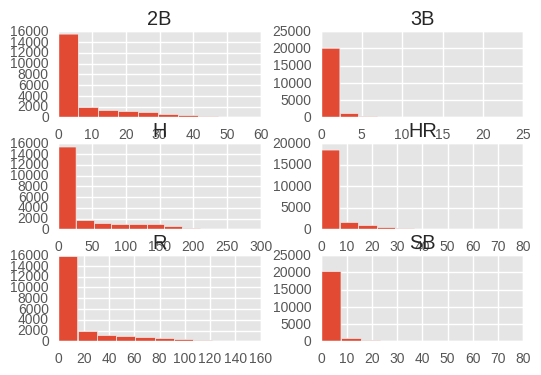

In [3]:
#plotando os dados de jogadas
dfbenef[['HR','R','H','2B','3B','SB']].hist()

Vemos que a primeira barra é onde se concentram a maior quantidade de pontos, seguido por barras bem menores, a primeira vista creio que a primeira seja dado pelos atletas iniciantes/amadores/baixa divisão e as demais barras sejam onde ficam os atletas de ponta e super-estrelas do Baseball.

Agora criaremos as variaveis de média por jogo e após a media para o periodo (2000-2014), obtendo assim uma melhor descrição do desempenho do jogador.

/usr/local/lib/python3.5/dist-packages/seaborn/categorical.py:2342: UserWarning: The violinplot API has been changed. Attempting to adjust your arguments for the new API (which might not work). Please update your code. See the version 0.6 release notes for more info.
  warnings.warn(msg, UserWarning)


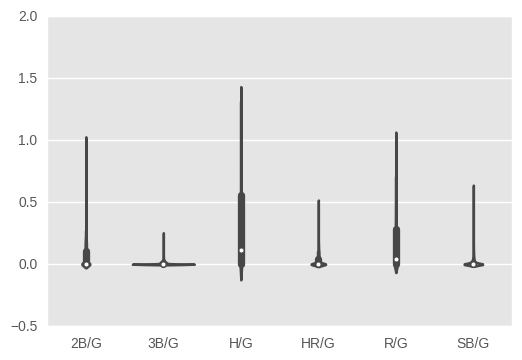

In [4]:
#obtém a média salarial para o periodo e define player id como index.
del dfcusto['yearID']
dfcusto = dfcusto.groupby('playerID').mean()

#obtém a média da -média de jogadas por jogo- para o periodo.
dfbenef[['HR/G','R/G','H/G','2B/G','3B/G','SB/G']] = dfbenef[['HR','R','H','2B','3B','SB']].div(dfbenef.G, axis='index')
dfbenef.drop(['HR','R','H','2B','3B','SB','yearID','G'], axis=1, inplace=True)
dfbenef = dfbenef.groupby('playerID').mean()
sns.violinplot(x=dfbenef[['2B/G','3B/G','H/G','HR/G','R/G','SB/G']])

In [5]:
#une as tabelas pelo indice "playerID" e mantem apenas os valores existentes para os dois dataframes.
df = pd.merge(dfcusto,dfbenef,left_index=True,right_index=True,how='inner')
#Felizmente não temos nenhum valor faltando logo não precisaremos dessa parte do código.
"""
print(df.shape)
#descarta valores missing
df.dropna(inplace=True)
print(df.shape)
"""
df.head(3)

,salary,HR/G,R/G,H/G,2B/G,3B/G,SB/G
playerID,,,,,,,
aardsda01,1322821,0.0,0.000000,0.000000,0.0,0.0,0.0
abadan01,327000,0.0,0.037037,0.074074,0.0,0.0,0.0
abadfe01,629100,0.0,0.000000,0.004505,0.0,0.0,0.0


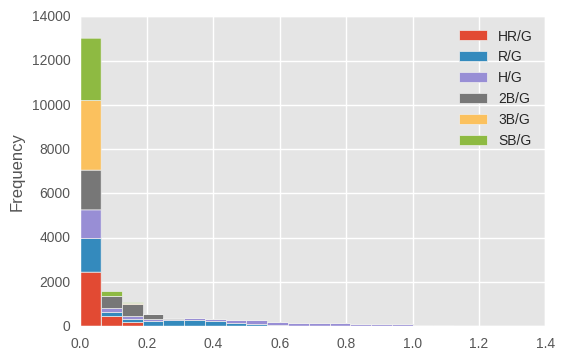

In [6]:
#analisando a distribuição
df[['HR/G','R/G','H/G','2B/G','3B/G','SB/G']].plot.hist(stacked=True, bins=20)

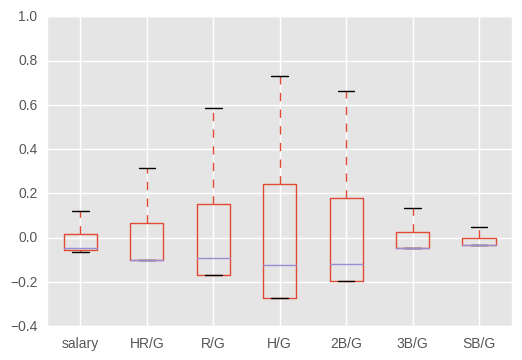

In [7]:
#normalizando os dados pelo desvio padrão
df = (df - df.mean()) / (df.max() - df.min())
#plotando o grafico de caixas para analise das variaveis
df.boxplot()

Podemos ver que as jogadas Hits, Doubles e Runs tem a maior variação entre os jogadores, assim focaremos nestas três jogadas para analisar a varição salarial

'H/G = r_value: 0.3166, p_value: 2.295e-74, std_err: 0.005885'

'2B/G = r_value: 0.3114, p_value: 6.954e-72, std_err: 0.007622'

'R/G = r_value: 0.3326, p_value: 2.59e-82, std_err: 0.008973'

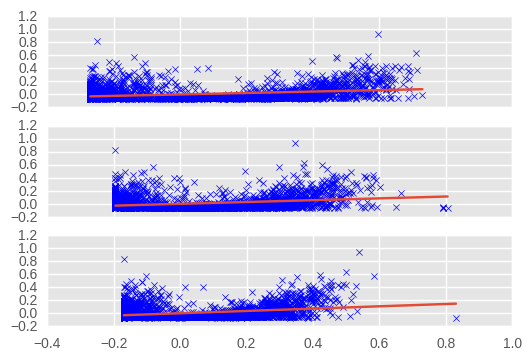

In [9]:
#nesta parte opto por plotar subgraficos para analisa-los em conjunto
f, ((ax1, ax2, ax3)) = plt.subplots(3, sharex='col', sharey='row')
#salvo os subgraficos em uma lista para que sejam acessados e configurados pelo loop
ax = [ax1,ax2,ax3]
#defino y como a variavel alvo, salario, para analisar em função de x (pontos) quais as influencias em y.
y = df['salary']
for i,k in enumerate(['H/G','2B/G','R/G']):
    x = df[k]
    ax[i].scatter(x,y,marker='x')
    slope, intercept, r_value, p_value, std_err = stats.linregress(x,y)
    xl = np.linspace(x.min(),x.max(),2)
    yl = xl * slope + intercept
    ax[i].plot(xl,yl)
    #imprimo os coeficientes da reta
    display("{} = r_value: {:.4}, p_value: {:.4}, std_err: {:.4}".format(k,r_value, p_value, std_err))

Não é possivel ver uma tendencia clara no gráfico, talvez com a remoção da parte negativa haveria uma tendencia, porém pela minha premissa e para não enviesar os dados isso não deve ser feito. Como ultima análise olharei o desempenho dos jogadores que recebem os melhor salários do Baseball

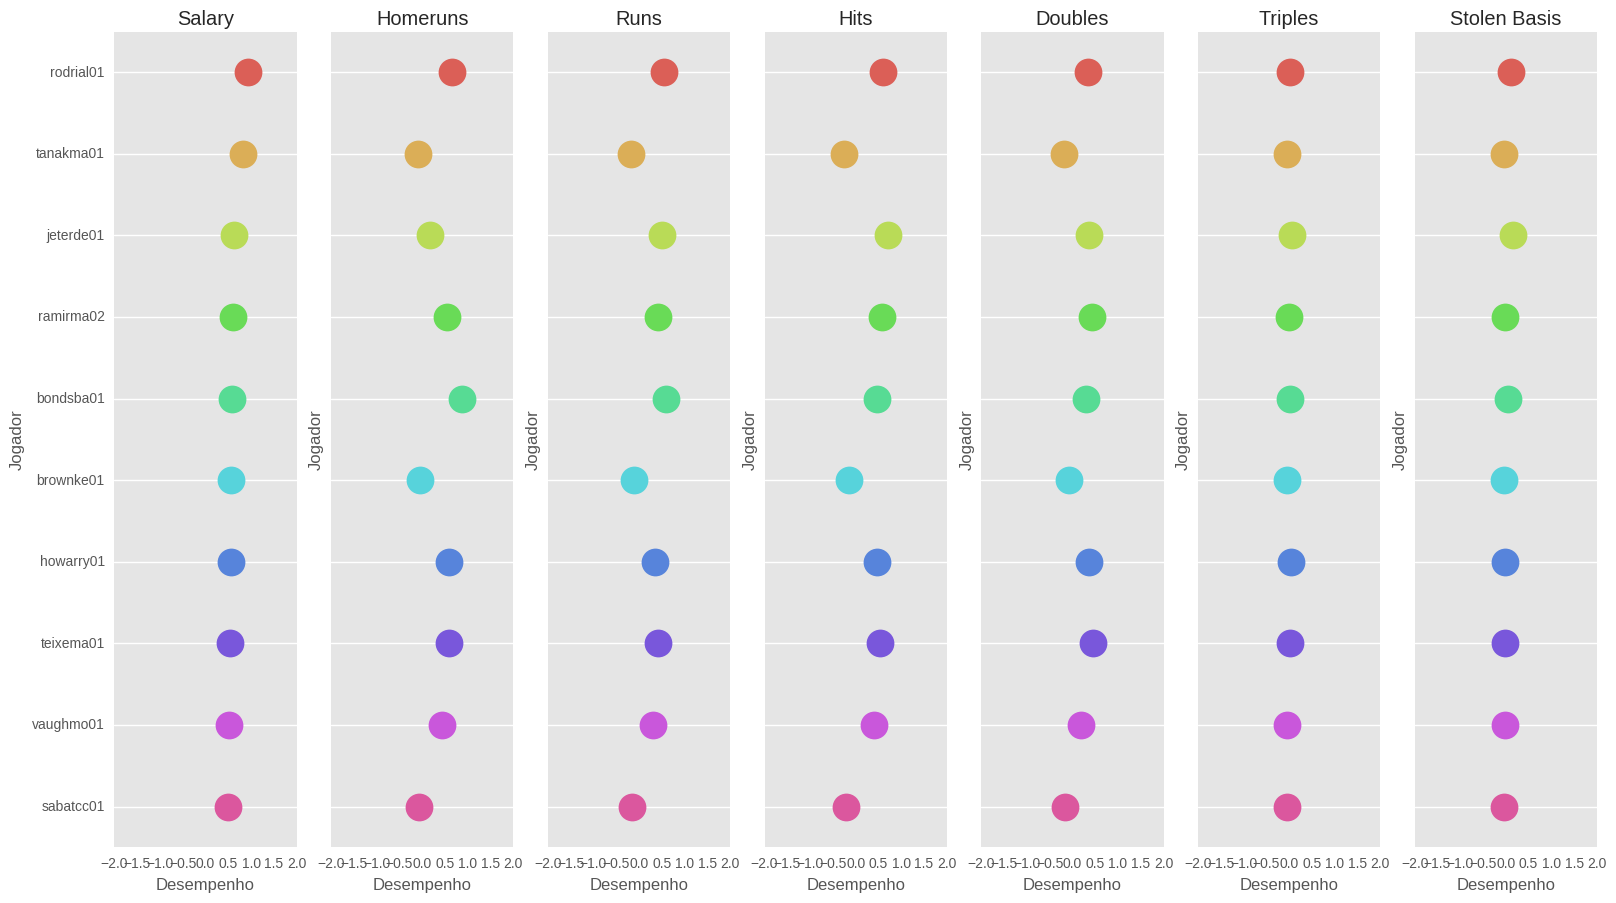

In [57]:
top10 = df.sort_values("salary", ascending=False).head(10)
top10['playerID'] = top10.index
# Make the PairGrid
g = sns.PairGrid(top10,
                 x_vars=top10.columns[:-1], y_vars=["playerID"],
                 size=9, aspect=.25)
# Draw a dot plot using the stripplot function
g.map(sns.stripplot, size=20, orient="h",
      palette="hls", edgecolor="black")
# Use the same x axis limits on all columns and add better labels
g.set(xlim=(-2, 2), xlabel="Desempenho", ylabel="Jogador")
# Use semantically meaningful titles for the columns
titles = ["Salary", "Homeruns","Runs","Hits","Doubles", "Triples","Stolen Basis"]
for ax, title in zip(g.axes.flat, titles):
    # Set a different title for each axes
    ax.set(title=title)
    # Make the grid horizontal instead of vertical
    ax.xaxis.grid(False)
    ax.yaxis.grid(True)

sns.despine(left=True, bottom=True)

***Conclusão:*** Através da analise dos gráficos de regressão acima podemos ver que sendo x o número de jogadas e y o salário, separadamente essas jogadas não demonstram que tem influência importante ao salário dos jogadores, também os 10 melhores remunerados se destacam apenas um pouco da média e em alguns casos tem desempenho pior, porém como é visto, seus salários estão muito acima, talvez a soma de todas elas e mais variáveis ocultas, podendo ser jogadas memoraveis ou demais estrelismos[1], que não são mencionados por esses dados.

[1]Como no futebol que os jogadores mais bem pagos não necessariamente marcam mais gols, mas sim o estrelismo deles, como dribles e disputas que tornam esses jogadores mais notaveis.